In [1]:
## 08/04/20- PDFs of settling onset time and saving output required for plots_KooiFigs2and3.ipynb using Ts and Vs (settling onset time and settling velocity)
# For now, only running this from r_pl (radius/size of plastic)= -07 to -04 since smaller plastic was being deleted at the surface (must fix this bug in my 3D script first)

import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math as math
import statistics as stats
import pickle
import numpy as np

dirwrite = '/home/dlobelle/Kooi_figures/3D_NPacific_10x10grid/'

# CHOOSE 
rho_pl = 840  # 840 #920 #940

if rho_pl == 840:
    c = "tab:blue"
elif rho_pl == 920:
    c = "tab:orange" 
elif rho_pl == 940:
    c = "tab:green" 

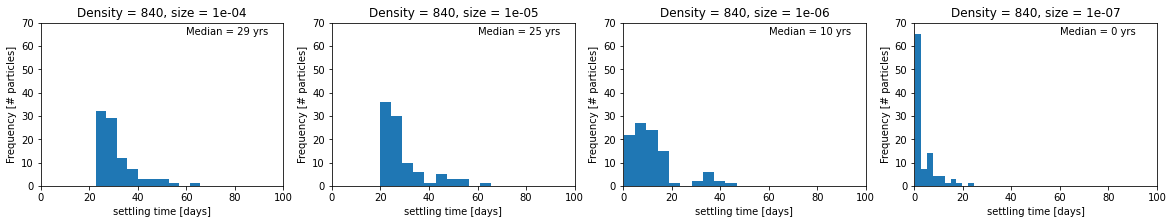

In [2]:
Ts = []
Vs = []
fig, ax = plt.subplots(1,4, figsize=(20,3)) #, facecolor='w', edgecolor='k')
axs = ax.ravel()

for nf in range(4,8):
    data = Dataset('/home/dlobelle/Kooi_data/data_output/rho_'+str(int(rho_pl))+'kgm-3/Kooi+NEMO_3D_grid10by10_rho'+str(int(rho_pl))+'_r1e-0'+str(int(nf))+'_100days_30dtsecs_5hrsoutdt.nc')
    t0 = data['time'][:]/86400
    z_all = data['z']
    t1 = t0[1,:]

    z_set = []
    for i in range (len(z_all)):
        z0 = np.array(z_all[i,:])
        z1 = (np.where(z0 > 1.))
        z2 = z1[0]
        #print(z2)
        if not z2.any(): 
            continue
        else:
            z_set.append(z2[0])
        
    t_set = t1[z_set]       
    ax[nf-4].hist(t_set, color= c) #"green")  
    ax[nf-4].set_xlabel('settling time [days]')
    ax[nf-4].set_ylabel('Frequency [# particles]')
    ax[nf-4].set_xlim(t1[0],t1[-1])
    ax[nf-4].set_ylim(0,70)
    ax[nf-4].set_title('Density = '+str(rho_pl)+', size = 1e-0'+str(nf))
    
    # find median of PDFs for settling onset time
    t0 = stats.median(t_set)
    t = str('Median = '+str(int(t0))+' yrs')
    ax[nf-4].text(60,65,t)
    Ts.append(t0)
    
    # find maximum absolute settling velocity 
    vs0 = data['vs'][:]
    a = abs(np.array(vs0))
    Vs.append(a.max()*86400)

dir_pickle = ('/home/dlobelle/Kooi_data/data_input/Ts_Vs_rho'+str(rho_pl)+'.pickle')
# with open(dir_pickle, 'wb') as TsVs:
#     pickle.dump([Ts,Vs], TsVs)

plt.savefig(dirwrite + 'PDFs_subplots_Ts_sett_onset_time_rho='+str(rho_pl)+'_all_sizes(10x10grid).pdf', format='pdf')

([<matplotlib.axis.XTick at 0x2b669d7157b8>,
 [Text(0, 0, '10-7'),
  Text(0, 0, '10-6'),
  Text(0, 0, '10-6'),
  Text(0, 0, '10-6')])

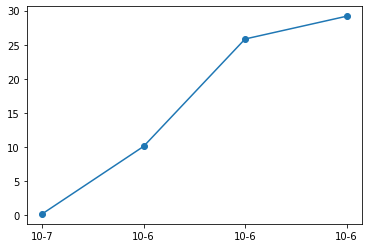

In [3]:
plt.plot(np.flip(Ts),'-o')
plt.xticks([0, 1, 2,3], ['10-7','10-6','10-6','10-6'])